# Differential expression analysis


You have now successfully run the pipeline and checked the first quality control metrics of your fastq files. However, this is only primary analysis.

We would now like to understand exactly the difference between our groups of mice. 

Which pipeline would you use for this?

I would use nf-core/differentialabundance pipeline. 


Please paste here the command you used

In [1]:
!pwd

/Users/weronikajaskowiak/Desktop/practical_course_2/day_3_3


In [1]:
import pandas as pd
#samplesheet 
data_3 = {
    'sample': ['Sham_oxy_1', 'Sham_oxy_2', 'Sham_oxy_3', 'Sham_oxy_4', 
               'Sham_Sal_1', 'Sham_Sal_2', 'Sham_Sal_3', 'Sham_Sal_4', 
               'SNI_oxy_1', 'SNI_oxy_2', 'SNI_oxy_3', 'SNI_oxy_4', 
               'SNI_Sal_1', 'SNI_Sal_2', 'SNI_Sal_3', 'SNI_Sal_4'],
    'condition': ['Sham_oxy', 'Sham_oxy', 'Sham_oxy', 'Sham_oxy',
                   'Sham_Sal', 'Sham_Sal', 'Sham_Sal', 'Sham_Sal',
                   'SNI_oxy', 'SNI_oxy', 'SNI_oxy', 'SNI_oxy',
                   'SNI_Sal', 'SNI_Sal', 'SNI_Sal', 'SNI_Sal'],
    'replicate':['1','2','3','4',
                 '1','2','3','4',
                 '1','2','3','4',
                 '1','2','3','4']
}

# Convert the data into a pandas DataFrame
samplesheet_df_3 = pd.DataFrame(data_3)

# Save the DataFrame to a CSV file
samplesheet_df_3.to_csv('samplesheet.csv', index=False)

In [2]:
#contrasts.csv 
data_2 = {
    'id': ['SNI_oxy_vs_Sham_Sal', 'Sham_oxy_vs_Sham_Sal', 'SNI_Sal_vs_Sham_Sal'],
    'variable': ['condition', 'condition', 'condition' ],
    'reference': ['SNI_oxy','Sham_oxy', 'SNI_Sal'],
    'target':['Sham_Sal','Sham_Sal', 'Sham_Sal']
}

# Convert the data into a pandas DataFrame
contrasts_df = pd.DataFrame(data_2)

# Save the DataFrame to a CSV file
contrasts_df.to_csv('contrasts.csv', index=False)

In [6]:
!nextflow run nf-core/differentialabundance --input samplesheet.csv --contrasts contrasts.csv --matrix salmon.merged.gene_counts.tsv --transcript_length_matrix salmon.merged.gene_lengths.tsv --genome GRCm38 --outdir differential_analysis_2 -profile docker --max_memory 8.GB 

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.1
Launching `https://github.com/nf-core/differentialabundance` [sick_jennings] DSL2 - revision: 3dd360fed0 [1.5.0]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : sick_jennings
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_

Explain all the parameters you set and why you set them in this way.


As an input, I passed samplesheet.csv, which contains metadata about the samples (sample, condition, replicate). For a contrast file, I passed contrasts.csv, which specifies pairwise comparisons between different experimental conditions (SNI_oxy_vs_Sham_Sal, Sham_oxy_vs_Sham_Sal, SNI_Sal_vs_Sham_Sal). For a matrix, I used salmon.merged.gene_counts.tsv, which contains the gene count matrix produced by the tool Salmon. For the transcript length matrix, I used salmon.merged.gene_lengths.tsv, which contains the gene length matrix corresponding to the transcript lengths for each sample. I had to use the flag --genome instead of --gtf due to occurring errors. It refers to the reference genome GRCm38, the Genome Reference Consortium Mouse Build 38, necessary for associating gene annotations, length, and coordinates with the reference data. The outdir flag specifies the output directory. The profile flag sets the execution environment profile, which is Docker in our case. I needed to use max_memory to adjust resources for my weak machine :(

How did the pipeline perform?

The execution of the pipeline wasn't time- and resource-intensive on the local machine and the overall results are satisfactory.


In [1]:
#!TODO

Would you exclude any samples? If yes, which and why?

I would exclude SNI_Sal_2 and SNI_Sal_4 based on DESeq2 and the PCA plot, which confirm my assumption from the previous task (day2_part_2), indicating significant differences in their expression profiles compared to the other samples.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

In [4]:
import pandas as pd

# Defining the dictionary with gene comparison data
genes = {
    "Comparison": [
        "Sham_Sal versus SNI_oxy in condition",
        "Sham_Sal versus Sham_oxy in condition",
        "Sham_Sal versus SNI_Sal in condition"
    ],
    "Up": [1, 0, 2],
    "Down": [1, 6, 77]
}

# Creating the dataframe
genes_df = pd.DataFrame(genes)

# Displaying the dataframe
print(genes_df)

                              Comparison  Up  Down
0   Sham_Sal versus SNI_oxy in condition   1     1
1  Sham_Sal versus Sham_oxy in condition   0     6
2   Sham_Sal versus SNI_Sal in condition   2    77


The above comparison is derived from the HTML report generated by the pipeline. It is important to consider that the parameters used for feature-wise filtering and exploratory analysis may differ from those employed by the authors.

To identify upregulated and downregulated genes, we examine the Log2FoldChange (Log2FC) value. A positive Log2FC indicates upregulation, while a negative Log2FC indicates downregulation.

After analyzing the HTML report file, for the comparison of Sham_Sal versus SNI_oxy, the upregulated gene is Gm22614 with a Log2FC value of 19.07, while the downregulated gene is Cdr1 with a Log2FC value of -17.72. Interestingly, in each comparison, Cdr1 is also downregulated relative to Sham_Sal. Additionally, the gene Adcyap1 is downregulated in the comparisons of Sham_Sal versus SNI_Sal and Sham_Sal versus Sham_oxy.

From the table on page 1236 I could only identify Adcyap1. It was stated in the paper: "In the mPFC, ADCYAP1 and HTT were predicted URs in the Sham-Oxy versus Sham-Sal condition" (upstream regulator not the same as upregulated gene). 

 In the paper was stated: "Differential expression (DE) analysis showed region-specific alterations in transcriptional profiles. The comparison of SNI-Oxy versus Sham-Sal groups resulted in 1,012 differentially expressed genes (DEGs) in the NAc, 1,116 genes in the mPFC and 533 genes in the VTA (nominal P < 0.05, log2fold change ≥ |0.5|). SNI-Sal triggered 1,457 DEGs in the NAc, 1,052 DEGs in the mPFC and 425 DEGs in the VTA as compared to Sham-Sal controls. The Sham-Oxy condition altered 2,609 genes in the NAc, 1,449 genes in the mPFC and 584 genes in the VTA as compared to Sham-Sal controls.
 
In order to replicate on resulted data from the used pipeline:

In [25]:
df = pd.read_csv('/Users/weronikajaskowiak/Desktop/practical_course_2/day_3_3/differential_analysis_2/tables/differential/Sham_oxy_vs_Sham_Sal.deseq2.results.tsv', sep='\t')

filtered_genes = df[(df['pvalue'] < 0.05) & (df['log2FoldChange'].abs()>= 0.5)]
set_Sham_oxy_vs_Sham_Sal=set(filtered_genes['gene_id'])
count_filtered_genes = len(set_Sham_oxy_vs_Sham_Sal)

df_2 =pd.read_csv('/Users/weronikajaskowiak/Desktop/practical_course_2/day_3_3/differential_analysis_2/tables/differential/SNI_oxy_vs_Sham_Sal.deseq2.results.tsv', sep='\t')

filtered_genes_2 = df_2[(df_2['pvalue'] < 0.05) & (df_2['log2FoldChange'].abs()>= 0.5)]
set_SNI_oxy_vs_Sham_Sal = set(filtered_genes_2['gene_id'])
count_filtered_genes_2 = len(set_SNI_oxy_vs_Sham_Sal)


df_3 =pd.read_csv('/Users/weronikajaskowiak/Desktop/practical_course_2/day_3_3/differential_analysis_2/tables/differential/SNI_Sal_vs_Sham_Sal.deseq2.results.tsv', sep='\t')

filtered_genes_3 = df_3[(df_3['pvalue'] < 0.05) & (df_3['log2FoldChange'].abs()>= 0.5)]
set_SNI_Sal_vs_Sham_Sal = set(filtered_genes_3['gene_id'])
count_filtered_genes_3 = len(set_SNI_Sal_vs_Sham_Sal)

print(f"Sham_oxy_vs_Sham_Sal: {count_filtered_genes}")
print(f"SNI_oxy_vs_Sham_Sal: {count_filtered_genes_2}")
print(f"SNI_Sal_vs_Sham_Sal: {count_filtered_genes_3}")




Sham_oxy_vs_Sham_Sal: 25
SNI_oxy_vs_Sham_Sal: 2
SNI_Sal_vs_Sham_Sal: 131


The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

1) NAc (Nucleus Accumbens) is a key region of the brain involved in the reward circuit, playing a central role in processing pleasure, motivation, and reinforcement learning. The NAc is implicated in addiction, mood disorders, and the effects of drugs.


2) mPFC (Medial Prefrontal Cortex) is part of the prefrontal cortex, which is associated with decision-making, emotional regulation, and social cognition. The mPFC helps regulate behavior and is involved in cognitive functions such as working memory, planning, and response to stress. It's also important in modulating emotional responses, particularly those related to fear and reward.

3) VTA (Ventral Tegmental Area) is a group of neurons located in the midbrain that plays a major role in the dopaminergic system. It is involved in the release of dopamine and is crucial for reward, motivation, and the regulation of mood. The VTA sends dopamine signals to the nucleus accumbens and prefrontal cortex, making it central to behaviors related to reward, addiction, and emotional processing.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

There is a Table 1 on page 1236 that lists the DEGs underlying pathways along with their respective brain regions.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No, simply providing a list of DEGs to biologists would not be sufficient. The publication emphasizes that DEGs alone do not provide a complete picture of the biological processes involved. The authors complemented the DEG analysis with several additional layers of analysis, including Gene Ontology (GO) analysis, Ingenuity Pathway Analysis (IPA), upstream regulator analysis, and others. These additional methods provided insights into the molecular mechanisms, predicted upstream regulators, and the involvement of specific biological pathways, such as CREB signaling. All of this provides functional context and highlights the significance of the DEGs.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentioned.

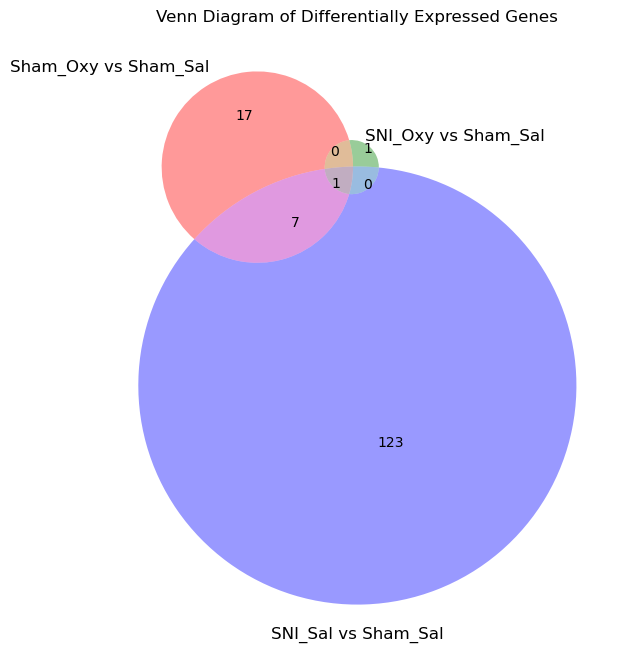

In [24]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(8, 8))
venn3([set_Sham_oxy_vs_Sham_Sal, set_SNI_oxy_vs_Sham_Sal, set_SNI_Sal_vs_Sham_Sal], 
      ('Sham_Oxy vs Sham_Sal', 'SNI_Oxy vs Sham_Sal', 'SNI_Sal vs Sham_Sal'))

plt.title("Venn Diagram of Differentially Expressed Genes")
plt.show()

# **Overall conclusions**

As observed, my results do not align with the authors' findings. One of the reasons is that I incorporated different tools in the differential expression pipeline than the authors did. In the paper, RNA-Seq data alignment was performed using HISAT2 for read alignment, and HT-Seq was used for read counting. The nf-core pipeline for RNA-seq analysis uses STAR for alignment and Salmon for quantification. Additionally, I had to use the GRCm38 version of the reference genome, whereas the study used GRCm39. The authors did not specify the parameters they used for differential analysis, which is another contributing factor to the discrepancies in results. The nf-core pipeline may also apply different thresholds for filtering low-expressed genes, which would impact downstream analyses.


In my opinion, the authors should outline a simple guide or flowchart in the methods section to provide researchers with a clear path to reproducing the results, from data acquisition to final analysis. The most important step is public sharing of pipelines, such as uploading the pipeline on nf-core.

